In [5]:
import mglearn
import sklearn

w[0]: 0.393906  b: -0.031804


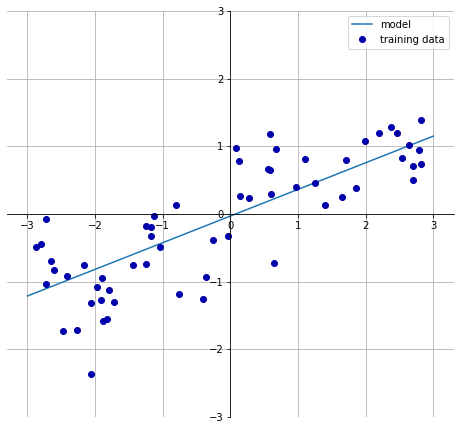

In [3]:
mglearn.plots.plot_linear_regression_wave()

**It can be observed that the slope is about 0.4(to figure this out Y/X) and the intercept is a tad bit below 0**

#### Linear Regression
- Linear Regression upsets the value of the Coefficient of feature/(slope) and the y-intercept that minimizes the mean square error between the predicted y value and the true regression target

### Ordinary least squares/ Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5)
lr = LinearRegression().fit(X_train, y_train)

In [53]:
print("lr.cofficient:{}".format(lr.coef_))

lr.cofficient:[0.42427022]


In [54]:
print("lr.intercept:{}". format(lr.intercept_))

lr.intercept:-0.11312062219477523


**Sklearn stores any thing derived from a training data with and underscore to create a seperation from the values that may be later set by individuals themselves**

In [55]:
print("Training set score:{}".format(lr.score(X_train, y_train)))
print("Test set score:{}".format(lr.score(X_test, y_test)))

Training set score:0.6451046094166151
Test set score:0.7354653381562118


In [56]:
print(X_train.shape)

(45, 1)


#### Trying the same model on the boston housing dataset

In [92]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)
lr = LinearRegression().fit(X_train, y_train)

print("Train set score:{}".format(lr.score(X_train, y_train)))
print("Test set score:{}".format(lr.score(X_test, y_test))) #Overfitted

Train set score:0.942699618930545
Test set score:0.641372988630778


### Ridge Regression

**Very similar to ordinary least squares but it has a fixed coefficent which tends to zero making the features have very little effect on the prediction.**

In [99]:
from sklearn.linear_model import Ridge
#we continued with the boston data set
#default alpha parameter used is 1.0 
ridge = Ridge().fit(X_train, y_train)
 
print("Training set score:{:.2}".format(ridge.score(X_train, y_train)))
print("Test set score:{:.2}".format(ridge.score(X_test, y_test)))


Training set score:0.86
Test set score:0.81


- Increasing alpha makes the coefficient tend to zero which results to the model making a more generalized prediction

In [106]:
#A more generalized model
ridge_10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score:{:.2}".format(ridge_10.score(X_train, y_train)))
print("Test set score:{:.2}".format(ridge_10.score(X_test, y_test)))

Training set score:0.77
Test set score:0.72


In [104]:
#A model with higher training set performance
#reduced alpha, less restrictions similar model to the odinary least square model
ridge_01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training set score:{}".format(ridge_01.score(X_train, y_train)))
print("Test set score:{}".format(ridge_01.score(X_test, y_test)))

Training set score:0.9127455628402061
Test set score:0.8309197909841645


- A reduction of the alpha resulted to a higher performance on the trining set

In [108]:
import matplotlib.pyplot as plt

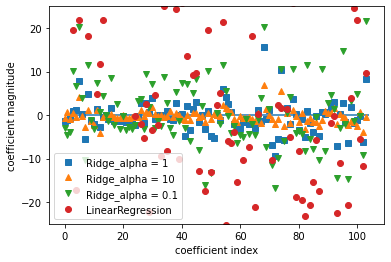

In [110]:
plt.plot(ridge.coef_, "s", label = "Ridge_alpha = 1")
plt.plot(ridge_10.coef_, "^", label = "Ridge_alpha = 10")
plt.plot(ridge_01.coef_, "v", label = "Ridge_alpha = 0.1")

plt.plot(lr.coef_, "o", label = "LinearRegression")

plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()